>>>>> Enter 1 for artsmall
>>>>> Enter 2 for wine
>>>>> Enter 3 for crime
>>>>> Enter 4 for artlarge
3

	============ Processing the data file : crime ============

TRAINING SET :  (298, 100) (298, 1)
TESTING SET :  (1695, 100) (1695, 1)

Training data size : 298
Training feature size : 100

>>>>> Enter the Upper limit of Lambdaa : 150

	################ Execution Segment of Task-1 : Regularization ################

	!!!!!!!!!!!!!!!! RESULTS Task 1 - Regularization !!!!!!!!!!!!!!!!

Minimum MSE of complete test data :  0.389
Lambdaa for Minimum MSE of complete testing data :  75

 Execution time for Task 1 - Regularization : 0.998 seconds



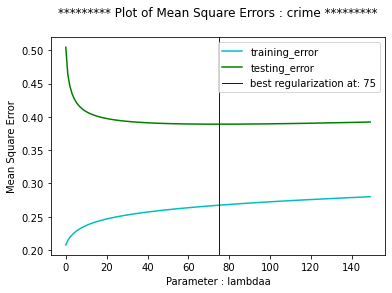


	################ Execution Segment of Task-2 : Model Selection using Cross Validation ################

Enter the number of Cross validation folds : 10

	!!!!!!!!!!!!!!!! RESULTS Task 2 : Model Selection using Cross Validation !!!!!!!!!!!!!!!!

Minimum MSE of 10 fold cross validation data :  0.337
Lambdaa for Minimum MSE of 10 fold cross validation data :  149
MSE of test data for best chosen lambdaa = 149 :  0.392

 Execution time for Task 2 - Model Selection using Cross Validation : 3.387 seconds


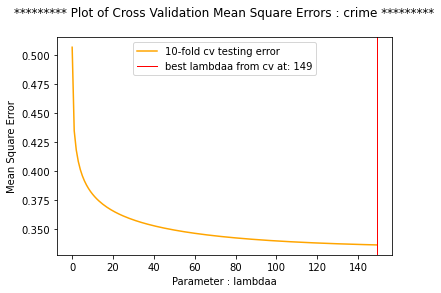


	************* Comparison Plot of Training/Testing/Cross Validation testing Errors *************



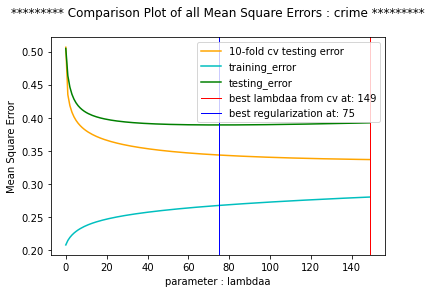


	################ Execution Segment of Task-3 : Bayesian Model Selection ################

Initialized Hyper-parameter : Alpha = 6.166785965862501  Beta = 5.711871806685709

	!!!!!!!!!!!!!!!! RESULTS Task 3 : Bayesian Model Selection !!!!!!!!!!!!!!!!

Finalized Alpha parameter :  425.64534102907885
Finalized Beta parameter :  3.2504320853535327

Lambdaa for Bayesian Hyper-parameters :  130.95
MSE of test data set for Bayesian lambdaa 130.9503874721885 is :  0.391

 Execution time for Task 3 : Bayesian Model Selectio : 0.094 seconds

	************* Comparison Plot of Training/Testing/Bayesian LR testing Errors *************



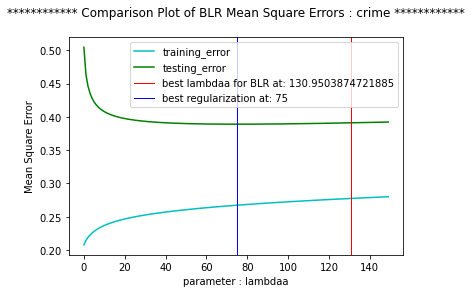


 Total Execution time for complete process : 13.750813245773315 seconds


In [1]:
# Import the libraries
import re
import os
import sys
import math
import random
import csv
import time
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure


def read_files(file_name):
    data = []
    with open('pp2data/' + file_name, 'r') as f:
        # creating a csv reader object
        f_csv = csv.reader(f)
        # extracting each data row one by one
        for row in f_csv:
            data.append(row)
    return data

def get_MeanSquareError(phi, t, w):

    estimate = []
    for i in range(len(phi)):
        est = list(np.dot(np.transpose(w),phi[i]))
        estimate.append(est)
        
    sqr_error = np.sum(np.square(t - estimate))
    mean_sqr_error = sqr_error/len(phi)
    
    return mean_sqr_error

def get_MSE_Regularized(lmbda_range,I,phi_train,t_train,phi_test,t_test):

    start = time.time()
    
    MSE_test_all_lambdaa = []
    MSE_train_all_lambdaa = []

    w_all = []
    for lambdaa in range(lmbda_range):
        w = np.dot(np.dot(np.linalg.inv(lambdaa*I + np.dot(np.transpose(phi_train),phi_train)),np.transpose(phi_train)),t_train)
        w_all.append(w)
        MSE_train = get_MeanSquareError(phi_train,t_train,w)
        MSE_train_all_lambdaa.append(MSE_train)

        MSE_test = get_MeanSquareError(phi_test,t_test,w)
        MSE_test_all_lambdaa.append(MSE_test)

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 1 - Regularization !!!!!!!!!!!!!!!!\n")
    print('Minimum MSE of complete test data : ',round(min(MSE_test_all_lambdaa),3))
    best_regularized_parameter = MSE_test_all_lambdaa.index(min(MSE_test_all_lambdaa))
    print('Lambdaa for Minimum MSE of complete testing data : ',best_regularized_parameter)
    end = time.time()
    exc = round((end-start),3)
    print('\n Execution time for Task 1 - Regularization : %s seconds\n'%round((end - start),3))


    x=range(lmbda_range)
    plt.plot(x,MSE_train_all_lambdaa,color='c',label = "training_error")
    plt.plot(x,MSE_test_all_lambdaa,color='g',label = "testing_error")
    plt.axvline(best_regularized_parameter, linewidth=1, color='b', label="best regularization at: {}".format(best_regularized_parameter))
    plt.xlabel('Parameter : lambdaa')
    plt.ylabel('Mean Square Error')
    plt.title('********* Plot of Mean Square Errors : %s *********\n'%inp)
    plt.legend()
    plt.show()
    
    return (best_regularized_parameter, MSE_train_all_lambdaa, MSE_test_all_lambdaa)



def get_Model_CV(lmbda_range,phi_train,t_train,phi_test,t_test,lmbda_reg,MSE_train_reg,MSE_test_reg):

    start = time.time()

    train_dict={}
    for i in range(len(phi_train)):
        train_dict[i] = phi_train[i]

    t_train_dict={}
    for i in range(len(t_train)):
        t_train_dict[i] = t_train[i]

    cv_folds = int(input("Enter the number of Cross validation folds : "))
    #cv_folds = 10
    MSE_test_all_lambdaa_cv = []

    for lambdaa in range(lmbda_range):
        MSE_for_each_cv = []

        for  j in range(cv_folds):

            test_cv = dict(list(train_dict.items())[j*int(len(train_dict)/cv_folds):(j*int(len(train_dict)/cv_folds))+int(len(train_dict)/cv_folds)])
            t_test_cv = dict(list(t_train_dict.items())[j*int(len(t_train_dict)/cv_folds):(j*int(len(t_train_dict)/cv_folds))+int(len(t_train_dict)/cv_folds)])
            #creating train data set from entire vocabulary
            train_cv = {}
            for i in set(train_dict.keys()) - set(test_cv.keys()):
                train_cv[i] = train_dict[i]
            t_train_cv = {}
            for i in set(t_train_dict.keys()) - set(t_test_cv.keys()):
                t_train_cv[i] = t_train_dict[i]


            phi_train_cv = np.array(list(train_cv.values()),dtype=float)
            t_train_cv_np = np.array(list(t_train_cv.values()),dtype=float)

            phi_test_cv = np.array(list(test_cv.values()),dtype=float)
            t_test_cv_np = np.array(list(t_test_cv.values()),dtype=float)

            train_cv_features = len(phi_train_cv[0])
            train_cv_size = len(phi_train_cv)

            I_cv = np.identity(train_cv_features)

            w_cv = np.dot(np.dot(np.linalg.inv(lambdaa*I_cv + 
                        np.dot(np.transpose(phi_train_cv),phi_train_cv)),np.transpose(phi_train_cv)),t_train_cv_np)

            MSE_test_cv = get_MeanSquareError(phi_test_cv, t_test_cv_np, w_cv )
            MSE_for_each_cv.append(MSE_test_cv)

        MSE_test_all_lambdaa_cv.append(np.mean(MSE_for_each_cv))

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 2 : Model Selection using Cross Validation !!!!!!!!!!!!!!!!\n")
    print('Minimum MSE of %s fold cross validation data : '%cv_folds,round(min(MSE_test_all_lambdaa_cv),3))
    lambdaa_best_from_cv = MSE_test_all_lambdaa_cv.index(min(MSE_test_all_lambdaa_cv))
    print('Lambdaa for Minimum MSE of %s fold cross validation data : '%cv_folds,lambdaa_best_from_cv)

    MSE_test_best_lambdaa = MSE_test_all_lambdaa[lambdaa_best_from_cv]

    print("MSE of test data for best chosen lambdaa = %s : "%lambdaa_best_from_cv, round(MSE_test_best_lambdaa,3))

    end = time.time()
    print('\n Execution time for Task 2 - Model Selection using Cross Validation : %s seconds'%round((end - start),3))

    x=range(lmbda_range)
    plt.plot(x,MSE_test_all_lambdaa_cv,color='orange',label = "%s-fold cv testing error"%cv_folds)
    plt.axvline(lambdaa_best_from_cv, linewidth=1, color='r', label="best lambdaa from cv at: {}".format(lambdaa_best_from_cv))
    plt.xlabel('Parameter : lambdaa')
    plt.ylabel('Mean Square Error')
    plt.title('********* Plot of Cross Validation Mean Square Errors : %s *********\n'%inp)
    plt.legend()
    plt.show()

    print("\n\t************* Comparison Plot of Training/Testing/Cross Validation testing Errors *************\n")
    x=range(lmbda_range)
    plt.plot(x,MSE_test_all_lambdaa_cv,color='orange',label = "%s-fold cv testing error"%cv_folds)
    plt.plot(x,MSE_train_reg,color='c',label = "training_error")
    plt.plot(x,MSE_test_reg,color='g',label = "testing_error")
    plt.axvline(lambdaa_best_from_cv, linewidth=1, color='r', label="best lambdaa from cv at: {}".format(lambdaa_best_from_cv))
    plt.axvline(lmbda_reg, linewidth=1, color='b', label="best regularization at: {}".format(lmbda_reg))
    plt.xlabel('parameter : lambdaa')
    plt.ylabel('Mean Square Error')
    plt.title('********* Comparison Plot of all Mean Square Errors : %s *********\n'%inp)
    plt.legend()
    plt.show()
    
    return (lambdaa_best_from_cv,MSE_test_best_lambdaa)

def BayesianModelParameter(phi_train, t_train, alpha, beta):   
    
    N = len(phi_train)
    sn_inverse = alpha*I + beta* np.dot(np.transpose(phi_train),phi_train)
    mn = beta*np.dot(np.dot(np.linalg.inv(sn_inverse),np.transpose(phi_train)),t_train)

    eigenvalues, eigenvectors = np.linalg.eig(beta* np.dot(np.transpose(phi_train),phi_train))

    gamma = np.sum(eigenvalues/(alpha+eigenvalues))

    alpha_new = gamma/float(np.dot(np.transpose(mn),mn))

    sum_squared_error = 0
    for i in range(len(t_train)):
        sum_squared_error += float(np.square(t_train[i] - np.dot(np.transpose(mn),phi_train[i])))

    beta_new = np.reciprocal(sum_squared_error/(N-gamma))

    return alpha_new,beta_new

def get_Model_Bayesian(lmbda_range,I,phi_train, t_train,phi_test,t_test,lmbda_reg,MSE_train_reg,MSE_test_reg):

    start = time.time()

    iteration = 0 
    alpha = random.uniform(1,10)
    beta = random.uniform(1,10)
    print("Initialized Hyper-parameter : Alpha = %s  Beta = %s"%(alpha,beta))

    alpha_diff = 1
    beta_diff = 1

    while True:

        iteration +=  1
        alpha_new, beta_new = BayesianModelParameter(phi_train, t_train, alpha, beta)

        #print("Iteration %s - \tNew Alpha = %s\tNew Beta = %s"%(iteration,alpha_new,beta_new))
        alpha_diff = abs(alpha-alpha_new)
        beta_diff = abs(beta-beta_new)

        if ((alpha_diff < 0.0001) and (beta_diff < 0.0001)):
            break

        alpha = alpha_new
        beta = beta_new

    lambdaa_best_from_blr = alpha_new/beta_new

    w_blr = np.dot(np.dot(np.linalg.inv(lambdaa_best_from_blr*I + 
                                np.dot(np.transpose(phi_train),phi_train)),np.transpose(phi_train)),t_train)

    MSE_test_blr = get_MeanSquareError(phi_test,t_test,w_blr)

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 3 : Bayesian Model Selection !!!!!!!!!!!!!!!!\n")
    print("Finalized Alpha parameter : ",alpha_new)
    print("Finalized Beta parameter : ",beta_new)
    print('\nLambdaa for Bayesian Hyper-parameters : ',round(lambdaa_best_from_blr,3))
    print("MSE of test data set for Bayesian lambdaa %s is : "%lambdaa_best_from_blr,round(MSE_test_blr,3))
    end = time.time()
    print('\n Execution time for Task 3 : Bayesian Model Selectio : %s seconds'%round((end - start),3))

    print("\n\t************* Comparison Plot of Training/Testing/Bayesian LR testing Errors *************\n")
    x=range(lmbda_range)
    plt.plot(x,MSE_train_reg,color='c',label = "training_error")
    plt.plot(x,MSE_test_reg,color='g',label = "testing_error")
    plt.axvline(lambdaa_best_from_blr, linewidth=1, color='r', label="best lambdaa for BLR at: {}".format(lambdaa_best_from_blr))
    plt.axvline(lmbda_reg, linewidth=1, color='b', label="best regularization at: {}".format(lmbda_reg))
    plt.xlabel('parameter : lambdaa')
    plt.ylabel('Mean Square Error')
    plt.title('************ Comparison Plot of BLR Mean Square Errors : %s ************\n'%inp)
    plt.legend()
    plt.show()
    
    return (lambdaa_best_from_blr,MSE_test_blr)

if __name__ == "__main__": 
    
    start_main = time.time()
    
    files = os.listdir('pp2data')
    datasets=[]
    for i in files:
        datasets.append(i.split('-')[1].split('.')[0])
    unique_files = list(set(datasets))
    
    for i in range(len(unique_files)):
        print(">>>>> Enter %d for %s"%((i+1),unique_files[i]))
    inp = unique_files[int(input())-1]
    print("\n\t============ Processing the data file : %s ============\n"%inp)
    
    train_set = read_files('train-'+inp+'.csv')
    train_label = read_files('trainR-'+inp+'.csv')
    print("TRAINING SET : ",(len(train_set),len(train_set[0])),(len(train_label),len(train_label[0])))
    test_set = read_files('test-'+inp+'.csv')
    test_label = read_files('testR-'+inp+'.csv')
    print("TESTING SET : ",(len(test_set),len(test_set[0])),(len(test_label),len(test_label[0])))
    
    train_features = len(train_set[0])
    train_size = len(train_set)
    print("\nTraining data size : %s\nTraining feature size : %s\n"%(train_size,train_features))
    
    
    I = np.identity(train_features)
    phi_train = np.array(train_set,dtype=float)
    t_train = np.array(train_label,dtype=float)
    phi_test = np.array(test_set,dtype=float)
    t_test = np.array(test_label,dtype=float)

    lmbda_range = int(input(">>>>> Enter the Upper limit of Lambdaa : "))
    
    ## Task -1 Execution #######
    print("\n\t################ Execution Segment of Task-1 : Regularization ################")
    lmbda_regularized, MSE_train_all_lambdaa, MSE_test_all_lambdaa = get_MSE_Regularized(lmbda_range,I,
                                                                        phi_train,t_train,phi_test,t_test)
    print("\n\t################ Execution Segment of Task-2 : Model Selection using Cross Validation ################\n")
    lambdaa_best_from_cv, MSE_test_best_lambdaa_cv = get_Model_CV(lmbda_range,phi_train,t_train,
                                    phi_test,t_test,lmbda_regularized,MSE_train_all_lambdaa,MSE_test_all_lambdaa)
    print("\n\t################ Execution Segment of Task-3 : Bayesian Model Selection ################\n")
    lambdaa_best_from_blr, MSE_test_blr = get_Model_Bayesian(lmbda_range,I,phi_train,t_train,phi_test,t_test,
                                                lmbda_regularized,MSE_train_all_lambdaa,MSE_test_all_lambdaa)
    
    
    end_main = time.time()
    print('\n Total Execution time for complete process : %s seconds'%(end_main - start_main))

    